# Import Library

In [53]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

# Import Data

In [54]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        # Check if the item is a file before opening it
        if os.path.isfile(os.path.join(directory, filename)):
            img = Image.open(os.path.join(directory, filename))
            img = img.resize((128, 128))
            img = img.convert('RGB')
            img = np.array(img) / 255.0
            images.append(img)
    return images

In [55]:
tumor_images = load_images('/content/project/data/yes')
no_tumor_images = load_images('/content/project/data/no')

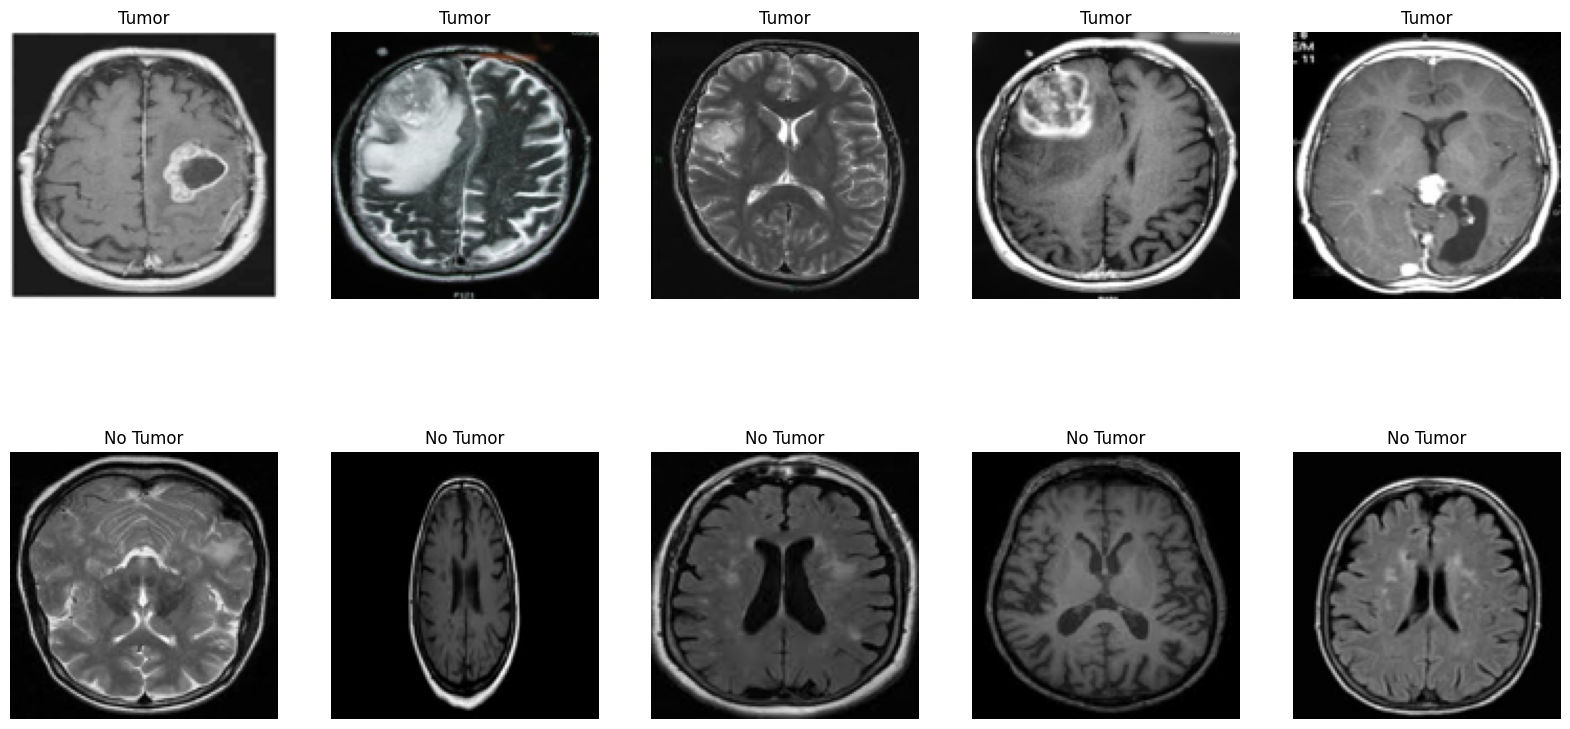

In [56]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(5):
    axes[0, i].imshow(tumor_images[i])
    axes[0, i].set_title('Tumor')
    axes[0, i].axis('off')

for i in range(5):
    axes[1, i].imshow(no_tumor_images[i])
    axes[1, i].set_title('No Tumor')
    axes[1, i].axis('off')

plt.show()

In [57]:
type(tumor_images)

list

In [58]:
len(tumor_images)

155

In [59]:
len(no_tumor_images)

98

In [60]:
tumor_images

[array([[[0.99215686, 0.99215686, 0.99215686],
         [0.92941176, 0.92941176, 0.92941176],
         [0.89803922, 0.89803922, 0.89803922],
         ...,
         [0.89803922, 0.89803922, 0.89803922],
         [0.91764706, 0.91764706, 0.91764706],
         [0.97647059, 0.97647059, 0.97647059]],
 
        [[0.9372549 , 0.9372549 , 0.9372549 ],
         [0.4627451 , 0.4627451 , 0.4627451 ],
         [0.23921569, 0.23921569, 0.23921569],
         ...,
         [0.24313725, 0.24313725, 0.24313725],
         [0.4627451 , 0.4627451 , 0.4627451 ],
         [0.95686275, 0.95686275, 0.95686275]],
 
        [[0.94509804, 0.94509804, 0.94509804],
         [0.3372549 , 0.3372549 , 0.3372549 ],
         [0.06666667, 0.06666667, 0.06666667],
         ...,
         [0.05882353, 0.05882353, 0.05882353],
         [0.34117647, 0.34117647, 0.34117647],
         [0.93333333, 0.93333333, 0.93333333]],
 
        ...,
 
        [[0.94509804, 0.94509804, 0.94509804],
         [0.3372549 , 0.3372549 , 0.33725

# Labeling

In [61]:
def assign_labels(tumor_images, no_tumor_images):
    tumor_labels = np.ones(len(tumor_images))
    no_tumor_labels = np.zeros(len(no_tumor_images))
    return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [62]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [63]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [64]:
type(tumor_labels)

numpy.ndarray

In [65]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [66]:
data

[array([[[0.99215686, 0.99215686, 0.99215686],
         [0.92941176, 0.92941176, 0.92941176],
         [0.89803922, 0.89803922, 0.89803922],
         ...,
         [0.89803922, 0.89803922, 0.89803922],
         [0.91764706, 0.91764706, 0.91764706],
         [0.97647059, 0.97647059, 0.97647059]],
 
        [[0.9372549 , 0.9372549 , 0.9372549 ],
         [0.4627451 , 0.4627451 , 0.4627451 ],
         [0.23921569, 0.23921569, 0.23921569],
         ...,
         [0.24313725, 0.24313725, 0.24313725],
         [0.4627451 , 0.4627451 , 0.4627451 ],
         [0.95686275, 0.95686275, 0.95686275]],
 
        [[0.94509804, 0.94509804, 0.94509804],
         [0.3372549 , 0.3372549 , 0.3372549 ],
         [0.06666667, 0.06666667, 0.06666667],
         ...,
         [0.05882353, 0.05882353, 0.05882353],
         [0.34117647, 0.34117647, 0.34117647],
         [0.93333333, 0.93333333, 0.93333333]],
 
        ...,
 
        [[0.94509804, 0.94509804, 0.94509804],
         [0.3372549 , 0.3372549 , 0.33725

In [67]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [68]:
data[0].shape

(128, 128, 3)

# Spliting Data

In [69]:
X = np.array(data)
y = np.array(labels)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [71]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

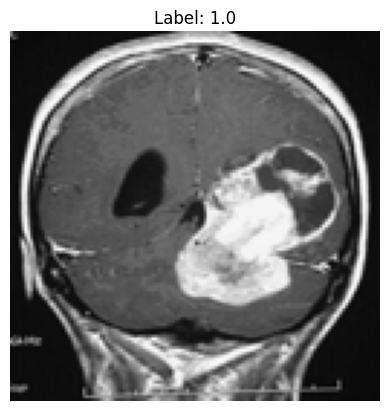

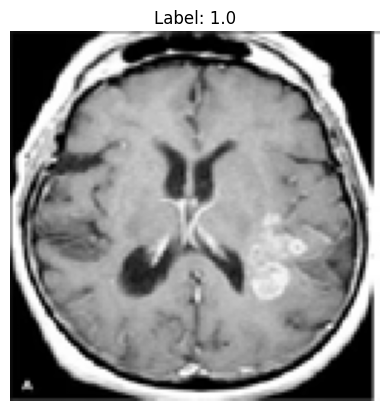

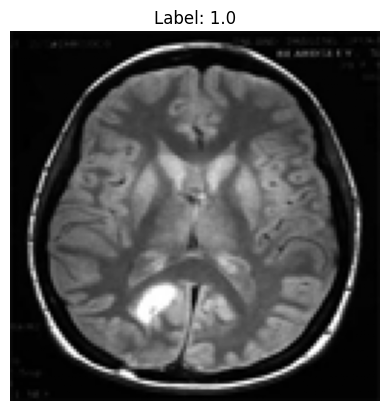

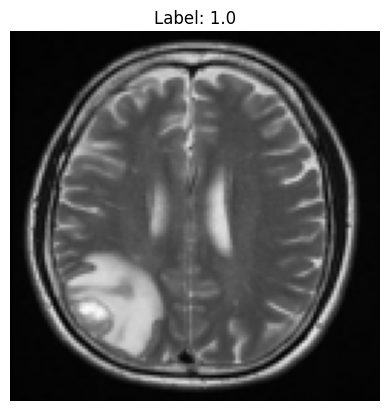

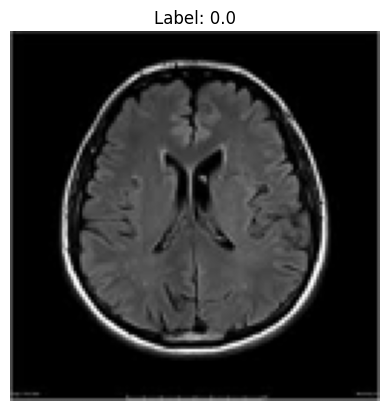

In [72]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [73]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [74]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

# Training Data

In [75]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (128,128,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      32,514,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,515,457 (124.04 MB)

 Trainable params: 32,515,457 (124.04 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [78]:
history = model.fit(train, validation_data = val, epochs = 20, verbose = 1)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 931ms/step - accuracy: 0.6116 - loss: 4.4998 - val_accuracy: 0.5500 - val_loss: 0.7751
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6623 - loss: 1.0905 - val_accuracy: 0.8500 - val_loss: 0.4612
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8031 - loss: 0.5131 - val_accuracy: 0.8000 - val_loss: 0.5063
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 915ms/step - accuracy: 0.7399 - loss: 0.5137 - val_accuracy: 0.9000 - val_loss: 0.3270
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8159 - loss: 0.3837 - val_accuracy: 0.9500 - val_loss: 0.2723
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 913ms/step - accuracy: 0.8512 - loss: 0.3525 - val_accuracy: 1.0000 - val_loss: 0.1902
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8749 - loss: 0.2619 - val_accuracy: 1.0000 - val_loss: 0.1360
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 912ms/step - accuracy: 0.9461 - loss: 0.1965 - val_accuracy: 1.0000 - val_loss: 0.0863
Epo

In [79]:
evaluation = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7337 - loss: 0.8899


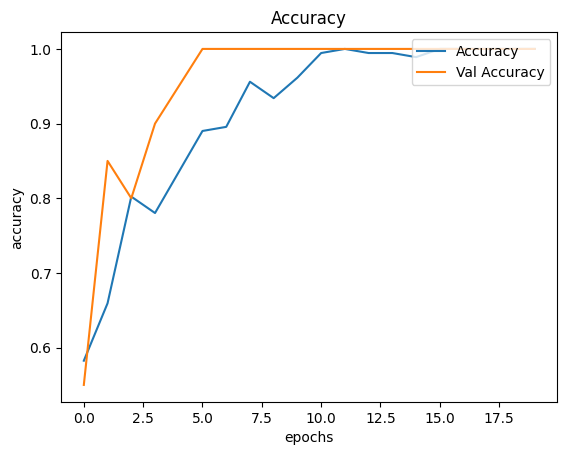

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

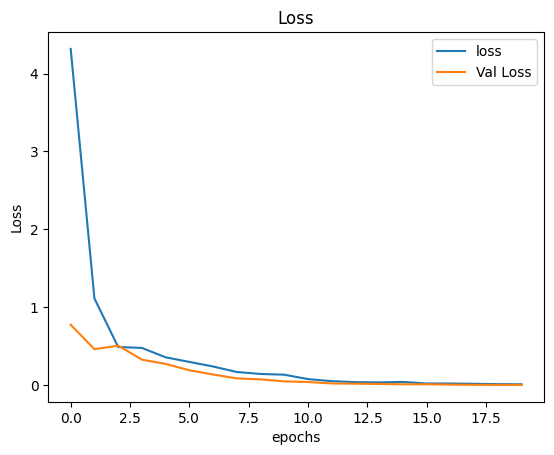

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

# Testing

In [84]:
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((128, 128))
    # Ensure the image is in RGB format
    img = img.convert('RGB')  # Convert to RGB explicitly
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Tumor detected"
    else:
        return "No tumor detected"

Saving tumor.jpeg to tumor.jpeg


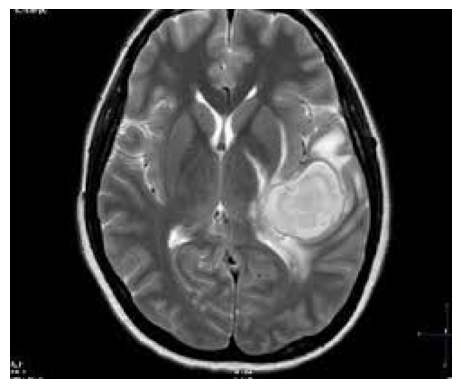

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Tumor detected


In [91]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)